In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('insurance.xlsx')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df = pd.get_dummies(df,drop_first='True').astype(int)

In [8]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [9]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.119875,1.205493,12110.012755,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,9381.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.000000,2.000000,16639.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


# Data Visualization

<Figure size 1200x1300 with 0 Axes>

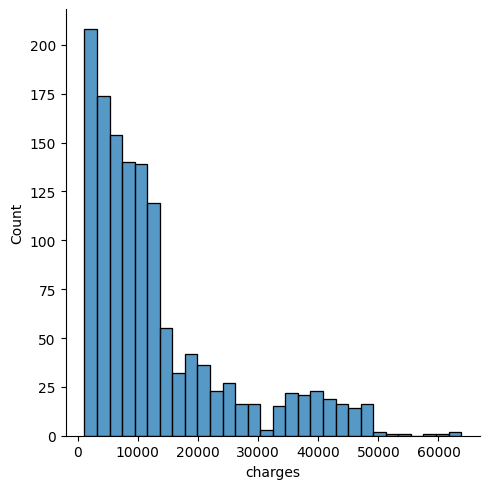

In [11]:
plt.figure(figsize=(12,13))
sns.displot(df['charges'])

<Axes: >

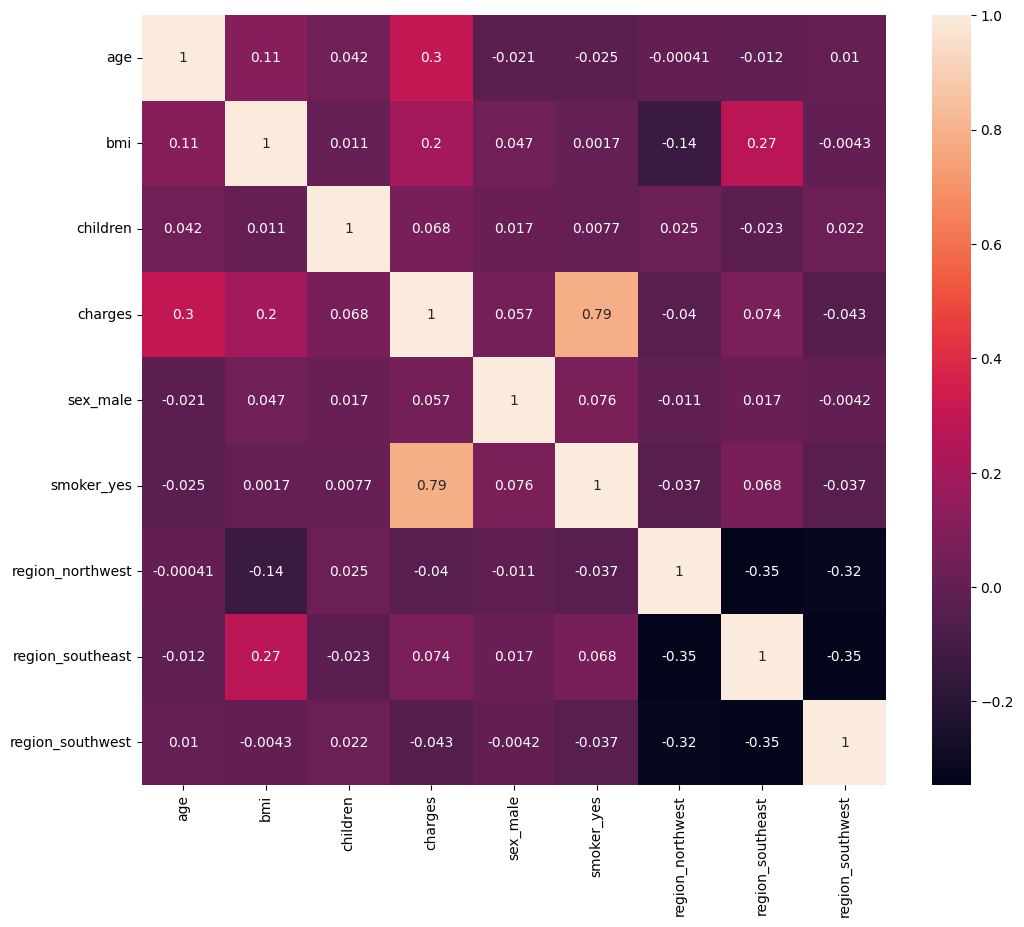

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
x = df.drop('charges',axis=1)
y = df['charges']

In [15]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3, random_state=78)

In [16]:
ytrain.head()

62     30166
861     7151
973     1759
209     6610
849    10601
Name: charges, dtype: int32

In [17]:
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
62,64,24,1,1,0,1,0,0
861,38,28,3,0,0,0,0,1
973,19,40,0,0,0,0,0,1
209,40,41,1,1,0,0,0,0
849,55,32,0,1,0,1,0,0


In [18]:
xtest.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
160,42,26,0,0,1,1,0,0
1326,42,32,0,0,0,0,0,0
544,54,30,0,1,0,1,0,0
624,59,28,0,1,0,1,0,0
914,33,24,2,1,0,1,0,0


In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtest,ytest)

LinearRegression()

In [21]:
pred = reg.predict(xtest)

In [22]:
pred

array([30348.5867859 ,  9616.9452087 , 11549.88831963, 12116.86357426,
        5485.98342478, 14563.07925315,  7768.53217305, 10338.05062912,
       29039.60318428, 32919.49318829,  8445.227004  , 10106.85904297,
        3463.02553738, 10456.35828487, 33401.56558461,  6381.73090842,
        7128.16410208, 29232.95755677, 26952.35637258, 32149.62160545,
       14316.65936379, 11848.78304266,  4546.75523188,  2689.82311527,
        8784.73535309, 29258.34165109, 28204.54553913,  3029.5224341 ,
       10567.20275185, 28939.5502052 ,  3917.11924029,  8770.40604683,
        3300.18436762, 14810.30984729, 29152.22353926, 10995.66717304,
        3649.88285759, 11166.9051609 ,  1759.96001113, 13928.38766447,
        1058.63571408,  8496.57270943,  9613.90644942, 26931.25843555,
       12806.24113611,  6044.73353738,  7702.46736074, 14114.66203253,
        2980.43970714, 23652.70730625,  5376.75208907,  5051.64936976,
        9710.75085207,  9008.60079414,   -92.81031446,  6743.98467556,
      

In [23]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': pred, 'Difference': abs(ytest-pred)})

In [24]:
df_pred

,Actual,Prediction,Difference
160,21348,30348.586786,9000.586786
1326,7050,9616.945209,2566.945209
544,10231,11549.888320,1318.888320
624,12129,12116.863574,12.136426
914,5257,5485.983425,228.983425
...,...,...,...
563,9058,14679.861399,5621.861399
881,2789,3571.431112,782.431112
795,18310,26914.588677,8604.588677
98,22412,30903.370118,8491.370118


In [25]:
m = reg.coef_

In [26]:
m

array([  241.29291512,   319.74466049,   460.8571428 ,  -454.09370291,
       22519.09838676,   131.01115335,  -711.12649624,  -300.47511213])

In [27]:
c = reg.intercept_
c

-10749.186361905044

In [28]:
reg.score(xtest,ytest)

0.7293540969241745